In [ ]:
%pip install sdv

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving real_train.csv to real_train.csv


In [ ]:
from sdv.datasets.local import load_csvs
from sdv.datasets.demo import download_demo

# This is the default folder name that the GOogle Colab notebook uses.
# Change this if you have your own folder with CSV files.
FOLDER_NAME = 'content/'

data = load_csvs(folder_name='/content/')

/usr/local/lib/python3.10/dist-packages/sdv/datasets/local.py:36: UserWarning: Ignoring incompatible files ['metadata.json'] in folder '/content/'.
  warnings.warn(f"Ignoring incompatible files {other_files} in folder '{folder_name}'.")


In [ ]:
data.keys()

dict_keys(['real_train'])

In [ ]:
train_set = data['real_train']

# use the head method to inspect the first few rows of the data
train_set.head(3)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,59.166.0.9,12425,149.171.126.3,80,6,7.0,1684,10168,14,18,27,1073,0,Benign
1,175.45.176.0,47135,149.171.126.16,8088,6,0.0,160,80,4,2,18,676,0,Benign
2,59.166.0.7,59116,149.171.126.5,21922,6,11.0,4968,3080,28,30,27,842,0,Benign


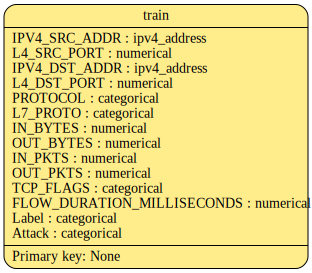

In [ ]:
from sdv.metadata import Metadata

metadata = Metadata.load_from_json('metadata.json')
metadata.visualize()

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(
    metadata, # required
)
synthesizer.fit(train_set)

In [ ]:
synthesizer.get_learned_distributions()

{'L4_SRC_PORT': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.00027105812434675806,
   'scale': 65534.99972894188,
   'a': 0.935694622695918,
   'b': 0.9080974693939571}},
 'L4_DST_PORT': {'distribution': 'beta',
  'learned_parameters': {'loc': -4.013867479021722e-31,
   'scale': 111521.34346142029,
   'a': 0.273730535023499,
   'b': 2.677339292182117}},
 'PROTOCOL': {'distribution': 'beta',
  'learned_parameters': {'loc': 1.7691230244380842e-06,
   'scale': 0.9998807620035997,
   'a': 1.003796101136745,
   'b': 1.001649018383195}},
 'L7_PROTO': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.0005572582138427644,
   'scale': 0.999394084559122,
   'a': 0.9908784015899794,
   'b': 0.9945047762819749}},
 'IN_BYTES': {'distribution': 'beta',
  'learned_parameters': {'loc': 63.99999999999999,
   'scale': 9817046.40506045,
   'a': 0.42517283614631274,
   'b': 715.418811524665}},
 'OUT_BYTES': {'distribution': 'beta',
  'learned_parameters': {'loc': -2.7464093169293284

In [ ]:
synthesizer.save(
    filepath='gaussian_copula_synthesizer.pkl'
)

synthesizer = GaussianCopulaSynthesizer.load(
    filepath='gaussian_copula_synthesizer.pkl'
)

In [ ]:
synthetic_train_set = synthesizer.sample(num_rows=len(train_set))

synthetic_train_set.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,171.41.106.10,40718,12.170.255.199,23900,6,0.0,11019,60270,102,73,27,0,0,Benign
1,146.186.194.108,49455,147.166.114.255,2468,6,5.0,2631,52931,77,84,27,6054,0,Benign
2,89.118.222.70,49672,8.28.104.65,65524,6,36.0,19515,496069,198,171,27,100106,0,Benign
3,125.139.134.248,3877,76.250.168.44,984,17,0.0,1138,9187,4,12,0,2469,0,Benign
4,206.13.22.96,13750,25.182.235.93,5189,17,36.0,158,7472,7,14,27,2,0,Benign


In [ ]:
synthetic_train_set.to_csv('gaussian_copula_synthetic_train.csv', index=False)